### Multi variable functions

You can use ANY kind of non-standard multi-input single-output function which returns real values.
In this example, we deal with a function of four variables and try to minimize it using the "hyperopt" python module.<br/>
<b>Note</b>: for <i>n</i>-variable function you must pass a <u>single</u> parameter as <i>n</i>-sized list, and not <i>n</i> input parameters!

In [2]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials
from hyperopt import STATUS_OK

def my_fcn(x):
    return np.sin(x[0]*(x[1]**2-x[2])/x[3])*np.cos(x[0])
   
x_mins_dict = fmin(
                fn=my_fcn,
                space=[hp.uniform('x_1', -100, 100), # search range for x[0] from -100 to 100
                       hp.uniform('x_2', -200, 100), # search range for x[1] from -200 to 100
                       hp.uniform('x_3', 0, 50), # search range for x[2] from 0 to 50
                       hp.uniform('x_4', -100, -20) # search range for x[3] from -100 to -20
                      ],
                algo=tpe.suggest,
                max_evals=500 # stop searching after 500 iterations
                )

100%|████████████████████████████████████████████████| 500/500 [00:30<00:00, 16.15it/s, best loss: -0.9929701556517146]


In [3]:
print(x_mins_dict) # the output of fmin is a dictionary
x_mins = [e for e in x_mins_dict.values()] # converts dictionary to list
print("my_fcn(x_mins) = " + str(my_fcn(x_mins))) # print function result at x_mins

{'x_1': -37.655734158571676, 'x_2': -114.7106365291187, 'x_3': 21.517362607413727, 'x_4': -61.18539419319436}
my_fcn(x_mins) = -0.9929701556517146


Now, it would be nice to plot the function with the corresponing x_mins, it can be a bit hard to find a way to visualize our data in a satisfying way. Therefore, the in the following section the same approach is repeated with a single variable version of the function, in order to nicely plot our results.

### Single variable functions

<b>Note</b>: even if we use a discrete set of points to plot, the curve is linear spline interpolated.
That's why the curve will look continuous.

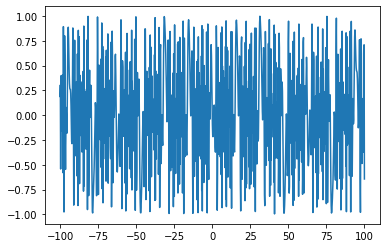

In [4]:
import matplotlib.pyplot as plt

def my_fcn_single(x):
    return np.sin(x*(x**2-x)/x)*np.cos(x)

x = np.linspace(-100,100,1000) # 1000 points equally distributed from -100 to 100
f = np.vectorize(my_fcn_single)
plt.plot(x,f(x))

In [5]:
x_min_dict = fmin(fn=my_fcn_single,
                   space=hp.uniform('x', -100, 100),
                   algo=tpe.suggest,
                   max_evals=500)
print(x_min_dict)

100%|████████████████████████████████████████████████| 500/500 [00:10<00:00, 48.83it/s, best loss: -0.9994964619398159]
{'x': -47.14529488207911}


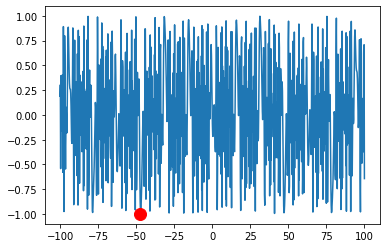

In [6]:
x_min = x_min_dict['x']
y_min = my_fcn_single(x_min)

plt.plot(x,f(x))
plt.plot(x_min,y_min,color="red", markersize="12",marker='o')
